In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

In [2]:
#Import Data:
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

In [3]:
#Basic Idea of Data:
print("Dataframe shape is ", df.shape)
print("Datafram contains columns - ",df.columns)

Dataframe shape is  (11251, 13)
Datafram contains columns -  Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


In [4]:
#Head of Dataset:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [5]:
#Information of Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [6]:
#Checking null Values:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
#Dropping Null Values:
df1 = df.dropna()
print(df1['Amount'].isnull().sum())
df1.shape

0


(11239, 13)

In [8]:
#Checking Duplicated Values:
dupes = df.duplicated()
sum(dupes)

8

In [9]:
#Data Type of Amnt as INT:
df1['Amount'] = df1['Amount'].astype(int)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21220\1456112377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Amount'] = df1['Amount'].astype(int)


In [10]:
#Amount column Check:
df1.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


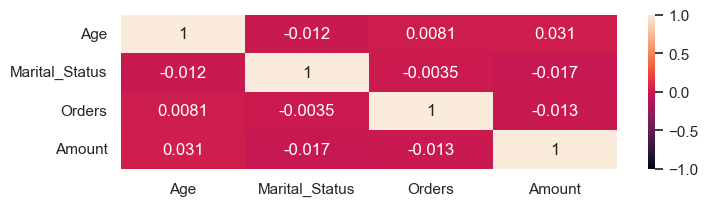

In [11]:
#Heatmap for Correlation:
cor = df1[['Age','Marital_Status','Orders', 'Amount']].corr()
plt.figure(figsize = (8,2))
sns.heatmap(cor,annot= True,vmax = 1,vmin = -1);

In [12]:
#Describing the dataset:
df1[['Age','Orders','Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11239.0,35.410357,12.753866,12.0,27.0,33.0,43.0,92.0
Orders,11239.0,2.489634,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9453.610553,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


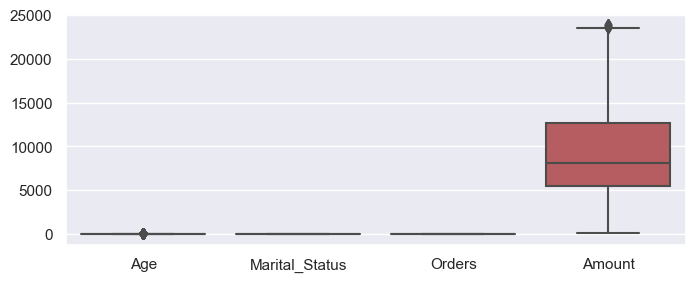

In [32]:
#Boxplots - Outliers
box= df1[['Age','Marital_Status','Orders', 'Amount']]
plt.figure(figsize = (8,3))
sns.boxplot(box);


In [14]:
#New Column Addition Product Types:
df1['Product_Type'] = df1['Product_Category']
df1['Product_Type'].replace(['Food','Furniture','Household items','Footwear & Shoes','Clothing & Apparel','Beauty','Electronics & Gadgets','Books','Stationery','Tupperware','Office','Pet Care','Veterinary','Auto','Games & Toys','Sports Products','Hand & Power Tools','Decor'],['House','House','House','Personal Care','Personal Care','Personal Care','Personal Care','Office Related Products','Office Related Products','Office Related Products','Office Related Products','Animal Related Products','Animal Related Products','Other Segment','Other Segment','Other Segment','Other Segment','Other Segment'],inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21220\1569906419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Product_Type'] = df1['Product_Category']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21220\1569906419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Product_Type'].replace(['Food','Furniture','Household items','Footwear & Shoes','Clothing & Apparel','Beauty','Electronics & Gadgets','Books','Stationery','Tupperware','Office','Pet Care','Veterinary','Auto','Games & Toys','Sports Products','Hand & Power Tools','Decor'],['House','House','H

# EDA:

# Customer Dynamics:

,Amount,User_ID
Age Group,,
0-17,2699653,132
18-25,17240732,652
26-35,42613442,1386
36-45,22144994,751
46-50,9207844,328
51-55,8261477,300
55+,4080987,203
Grand Total,106249129,3752


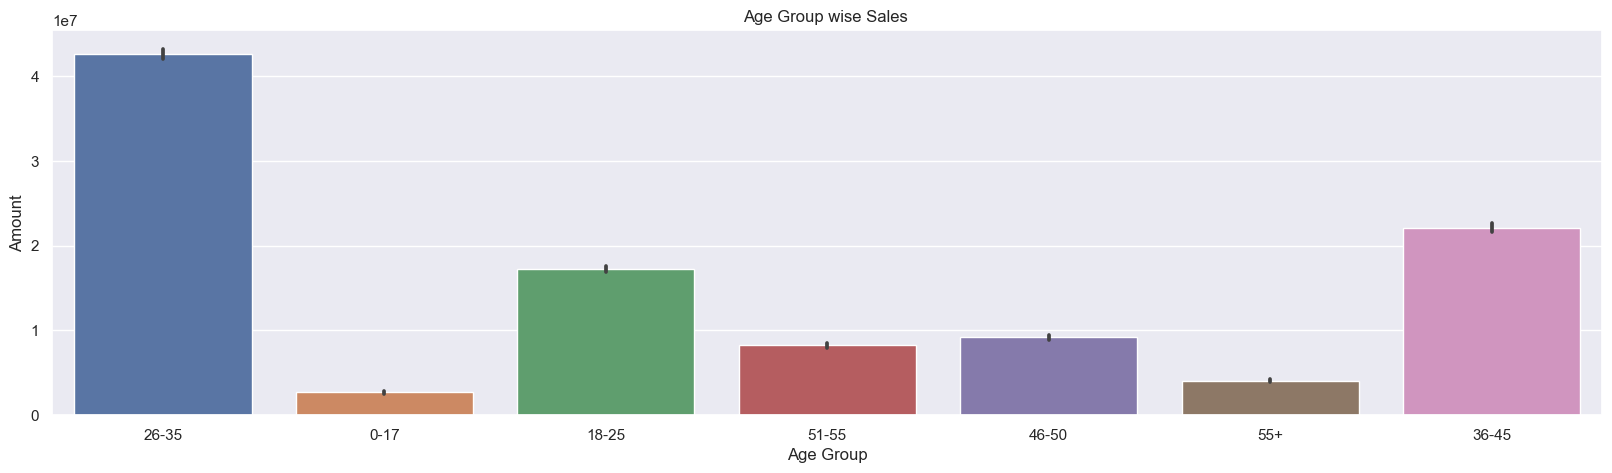

In [33]:
#1.Age goup wise Sales:
plt.figure(figsize = (20,5))
plt.title('Age Group wise Sales ')
sns.barplot(x = df1['Age Group'],y = df1['Amount'],estimator = 'sum');

#Age Grp Details:
AgeGroup_df= pd.pivot_table(data = df1,index = 'Age Group',values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'},margins=True,
margins_name='Grand Total')
AgeGroup_df

Amount  User_ID
Gender Age Group                   
F      0-17        1441409       96
       18-25      11887003      484
       26-35      30963953     1022
       36-45      15509956      531
       46-50       6743393      223
       51-55       5385208      205
       55+         2404931      136
M      0-17        1258244       81
       18-25       5353729      234
       26-35      11649489      544
       36-45       6635038      320
       46-50       2464451      133
       51-55       2876269      142
       55+         1676056      103

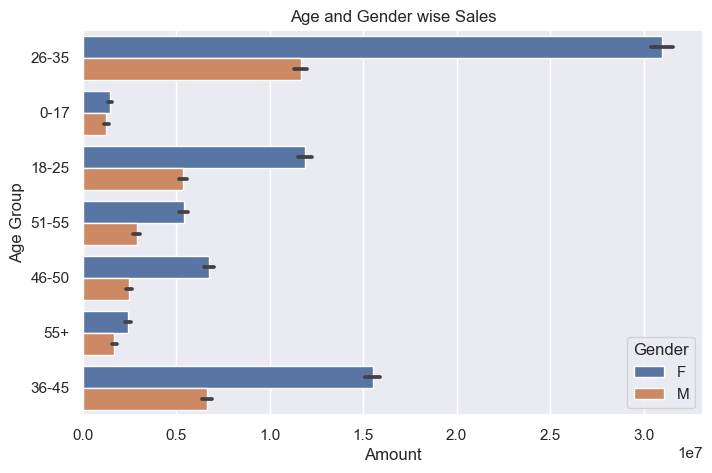

In [16]:
#2.Age group - Gender wise Sales:
plt.figure(figsize = (8,5))
plt.title('Age and Gender wise Sales')
sns.barplot(y = df1['Age Group'],x = df1['Amount'],hue = df1['Gender'],estimator = 'sum');

#Age Grp Gender Details:
AgeGroupGender_df= pd.pivot_table(data = df1,index = ['Gender','Age Group'],values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
AgeGroupGender_df

Amount  User_ID
Marital_Status Age Group                   
0              0-17        1655299       98
               18-25       9781617      501
               26-35      25008749     1122
               36-45      12870401      581
               46-50       5472555      258
               51-55       4884765      230
               55+         2451998      142
1              0-17        1044354       77
               18-25       7459115      428
               26-35      17604693      915
               36-45       9274593      503
               46-50       3735289      203
               51-55       3376712      191
               55+         1628989      124

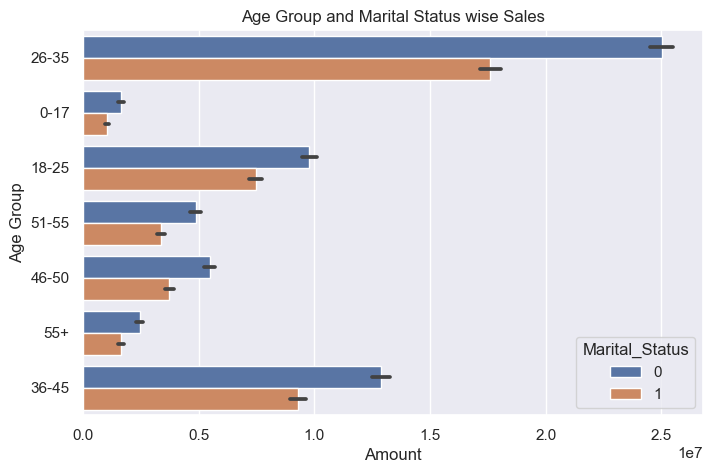

In [17]:
#3.Age group - Marital Status wise count:
plt.figure(figsize = (8,5))
plt.title('Age Group and Marital Status wise Sales')
sns.barplot(y = df1['Age Group'],x = df1['Amount'],hue = df1['Marital_Status'],estimator = 'sum');

#Age Grp Gender Details:
AgeGroupMarital_df= pd.pivot_table(data = df1,index = ['Marital_Status','Age Group'],values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
AgeGroupMarital_df


,Amount,User_ID
Occupation,,
Agriculture,2593087,253
Automobile,5368596,465
Aviation,12602298,972
Banking,10770610,860
Chemical,5297436,454
Construction,3597511,340
Food Processing,4070670,365
Govt,8517212,679
Healthcare,13034586,1039


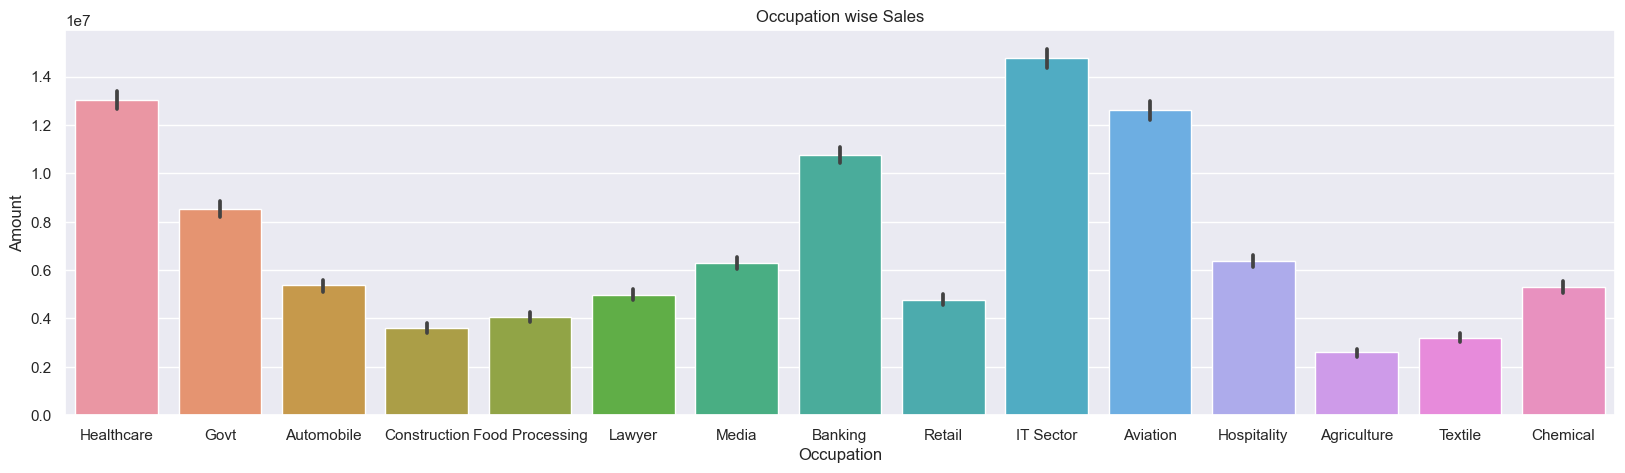

In [18]:
#4.Occupation wise Sales:
plt.figure(figsize = (20,5))
plt.title('Occupation wise Sales')
sns.barplot(x = df1['Occupation'],y = df1['Amount'],estimator = 'sum');
    
#Occupation Sales Details:
Occ_df= pd.pivot_table(data = df1,index = ['Occupation'],values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
Occ_df

Amount  User_ID
Gender Occupation                        
F      Agriculture       1840482      184
       Automobile        3768843      320
       Aviation          9007393      703
       Banking           7792295      629
       Chemical          3665084      319
       Construction      2595422      248
       Food Processing   2825277      259
       Govt              6002907      486
       Healthcare        8968231      722
       Hospitality       4183199      391
       IT Sector        10184835      777
       Lawyer            3383409      307
       Media             4375029      366
       Retail            3583695      315
       Textile           2159752      210
M      Agriculture        752605       71
       Automobile        1599753      151
       Aviation          3594905      299
       Banking           2978315      253
       Chemical          1632352      140
       Construction      1002089      104
       Food Processing   1245393      112
       Govt              2514305      207
       Healthcare        4066355      341
       Hospitality       2193206      191
       IT Sector         4570244      391
       Lawyer            1598256      148
       Media             1920803      176
       Retail            1199475      114
       Textile           1045220      100

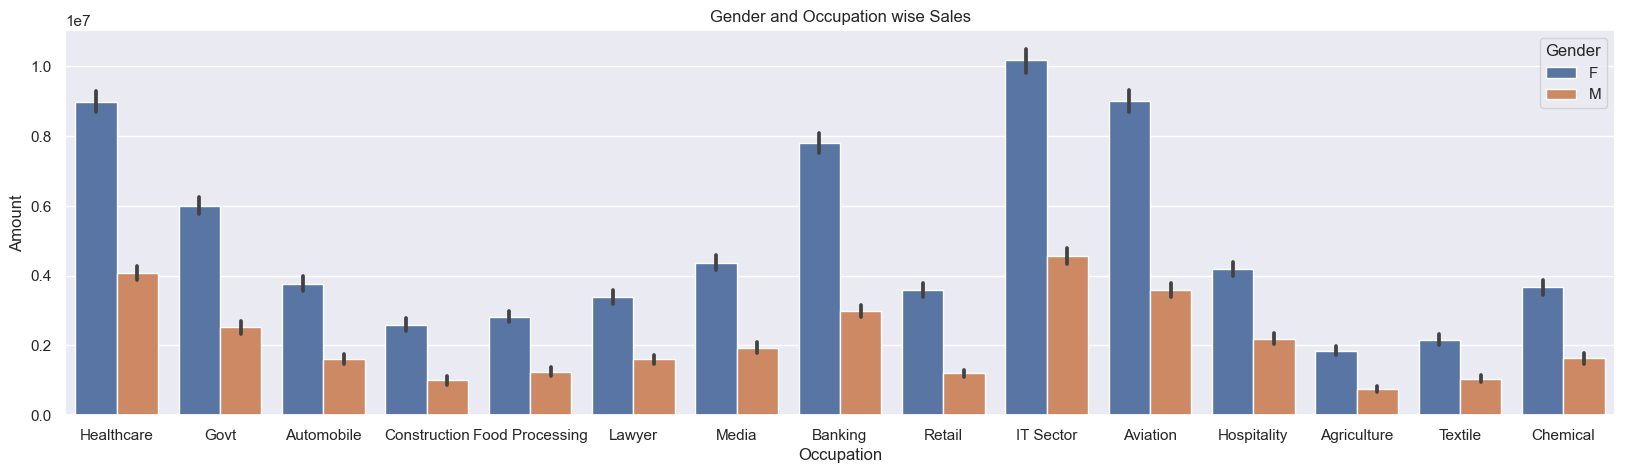

In [19]:
#4.1.Gender - Occupation wise Sales
plt.figure(figsize = (20,5))
plt.title('Gender and Occupation wise Sales')
sns.barplot(x = df1['Occupation'],y = df1['Amount'],hue = df1['Gender'],estimator = 'sum');

#Occupation Gender Details:
GenderOcc_df= pd.pivot_table(data = df1,index = ['Gender','Occupation'],values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
GenderOcc_df

# Product Understanding:

,Amount,User_ID
Product_Type,,
Animal Related Products,594979,273
House,40943271,2056
Office Related Products,3975107,364
Other Segment,11062214,807
Personal Care,49673558,2872
Grand Total,106249129,3752


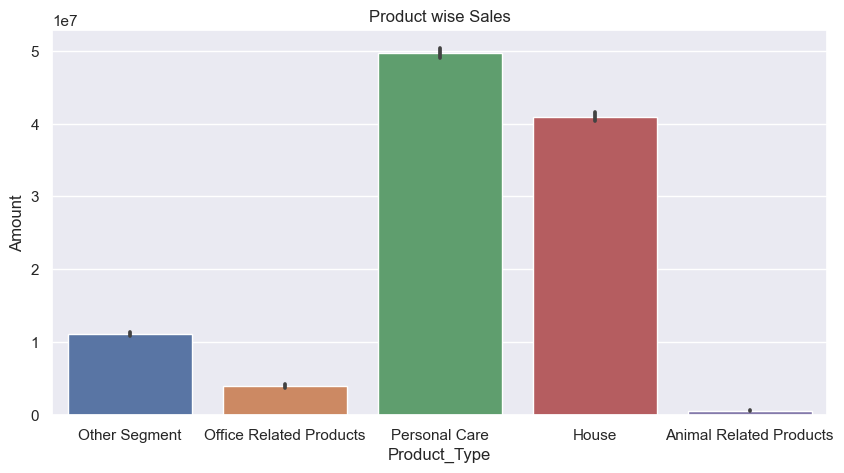

In [20]:
#1. Product Wise Sales:
plt.figure(figsize = (10,5))
plt.title('Product wise Sales')
y = sns.barplot(x = df1['Product_Type'],y = df1['Amount'],estimator = 'sum');

#Getting Product wise sales details:
ProdAmnt_df= pd.pivot_table(data = df1,index = 'Product_Type',values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'},margins=True,
margins_name='Grand Total')
ProdAmnt_df

Amount           User_ID      
Gender                          F         M       F     M
Product_Type                                             
Animal Related Products    421745    173234     194    80
House                    28430388  12512883    1435   717
Office Related Products   2182060   1793047     211   159
Other Segment             7730656   3331558     591   227
Personal Care            35571004  14102554    2084  1062

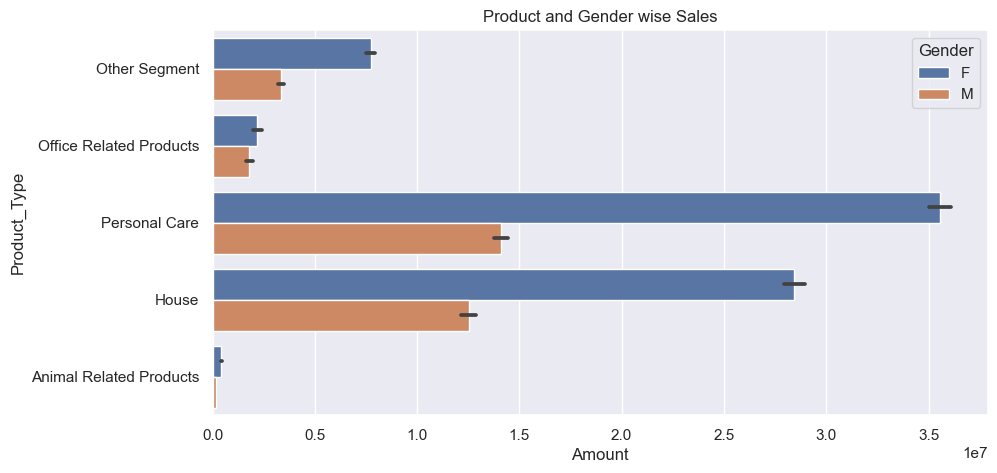

In [21]:
2.#Gender- Product wise Data:
plt.figure(figsize = (10,5))
plt.title('Product and Gender wise Sales')
sns.barplot(x = df1['Amount'],y = df1['Product_Type'],hue = df1['Gender'],estimator = 'sum');

#Getting Product - Gender wise sales details:
Prod_Amnt_df1= pd.pivot_table(data = df1,index = 'Product_Type',columns = 'Gender',values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
Prod_Amnt_df1

Amount  User_ID
Product_Type            Product_Category                        
Animal Related Products Pet Care                 482277      201
                        Veterinary               112702       78
House                   Food                   33933883     1698
                        Furniture               5440051      330
                        Household items         1569337      453
Office Related Products Books                   1061478       98
                        Office                    81936      108
                        Stationery              1676051      109
                        Tupperware              1155642       70
Other Segment           Auto                    1958609       95
                        Decor                    730360       94
                        Games & Toys            4331694      354
                        Hand & Power Tools       405618       24
                        Sports Products         3635933      338
Personal Care           Beauty                  1959484      391
                        Clothing & Apparel     16495019     1757
                        Electronics & Gadgets  15643846     1410
                        Footwear & Shoes       15575209      798

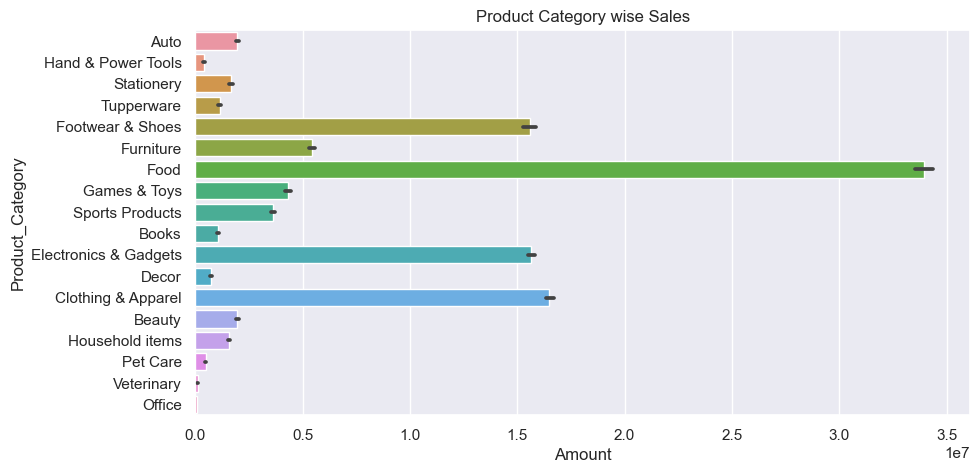

In [36]:
3.#Gender- Product wise Data:
plt.figure(figsize = (10,5))
plt.title('Product Category wise Sales')
sns.barplot(x = df1['Amount'],y = df1['Product_Category'],estimator = 'sum');

#Getting Product - Gender wise sales details:
ProdTy_df1= pd.pivot_table(data = df1,index = ['Product_Type','Product_Category'],values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
ProdTy_df1

# DEMOGRAPHIC UNDERSTANDING:

,Amount,User_ID
Zone,,
Central,41600872,2378
Eastern,7049213,708
Northern,12618752,1134
Southern,26606667,1790
Western,18373625,1415


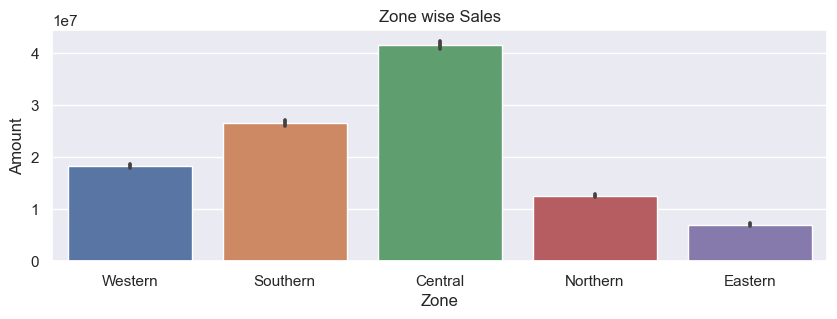

In [31]:
#1. Zone wise Sales:
plt.figure(figsize = (10,3))
plt.title('Zone wise Sales')
sns.barplot(x = df1['Zone'],y = df1['Amount'],estimator = 'sum');

#Zone wise Sales Details:
Zone_df1= pd.pivot_table(data = df1,index = 'Zone',values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
Zone_df1

Amount  User_ID
Zone     State                              
Central  Delhi             11603818      884
         Madhya Pradesh     8101142      777
         Uttar Pradesh     19374968     1423
         Uttarakhand        2520944      309
Eastern  Bihar              4022757      406
         Jharkhand          3026456      350
Northern Haryana            4220175      418
         Himachal Pradesh   4963368      536
         Punjab             1525800      190
         Rajasthan          1909409      216
Southern Andhra Pradesh     8037146      704
         Karnataka         13523540     1043
         Kerala             3894491      414
         Telangana          1151490      121
Western  Gujarat            3946082      399
         Maharashtra       14427543     1174

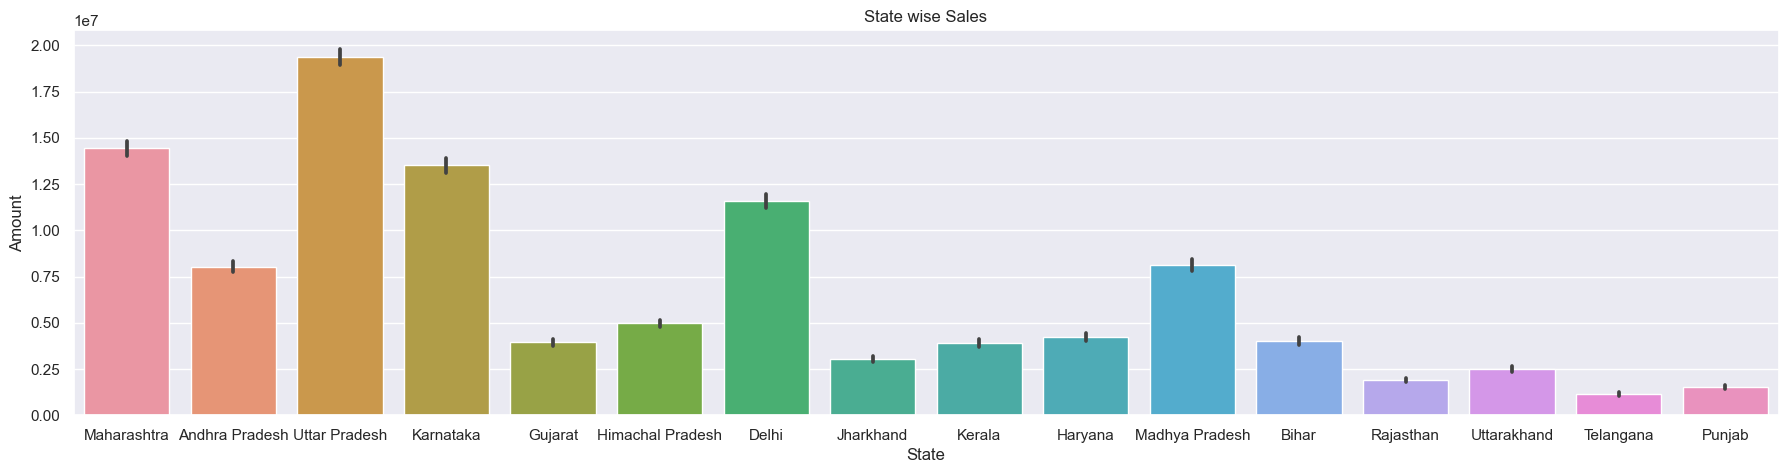

In [23]:
#2.State wise Sales:
plt.figure(figsize = (22,5))
plt.title('State wise Sales')
sns.barplot(x = df1['State'],y = df1['Amount'],estimator = 'sum');

#State wise Sales Details:
State_df1= pd.pivot_table(data = df1,index =['Zone','State'],values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
State_df1

Amount                                    \
Product_Type Animal Related Products     House Office Related Products   
Zone                                                                     
Central                       274030  16275060                 1945384   
Eastern                        37625   2560605                   92275   
Northern                       90146   3851015                  303151   
Southern                      106289   9148553                  883456   
Western                        86889   9108038                  750841   

                                                         User_ID        \
Product_Type Other Segment Personal Care Animal Related Products House   
Zone                                                                     
Central            3565477      19540921                     137  1033   
Eastern             619880       3738828                      19   194   
Northern           1286455       7087985                      42   276   
Southern           3206375      13261994                      46   693   
Western            2384027       6043830                      42   661   

                                                                  
Product_Type Office Related Products Other Segment Personal Care  
Zone                                                              
Central                          198           299          1591  
Eastern                           11            54           490  
Northern                          29           112           815  
Southern                          80           231          1171  
Western                           62           222           705

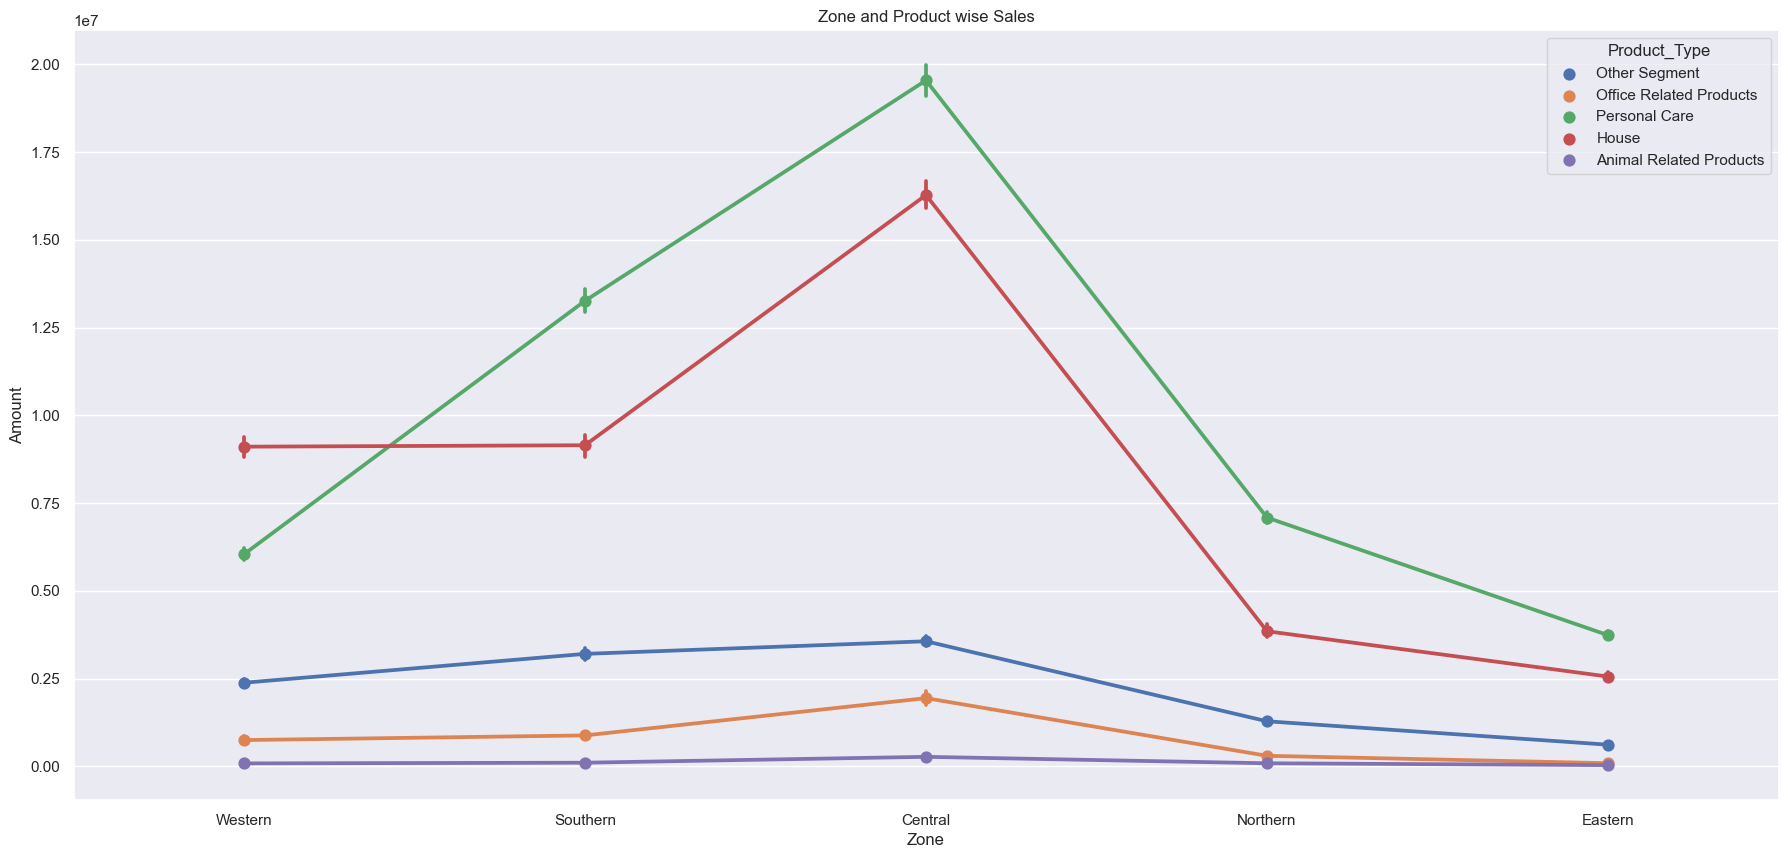

In [24]:
#3.Zone and Product type Wise Sales:
plt.figure(figsize = (22,10))
plt.title('Zone and Product wise Sales')
sns.pointplot(x = df1['Zone'],y = df1['Amount'],hue = df1['Product_Type'],estimator = 'sum');

#Zone and Product type wise Sales Details:
ZonePR_df1= pd.pivot_table(data = df1,index ='Zone',columns = 'Product_Type',values = ['Amount','User_ID'],aggfunc = {'Amount':'sum','User_ID':'nunique'})
ZonePR_df1